# 1: Dataset Collection
Kaggle: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels


# Data Preprocessing
### Step 1: Load the Dataset & Inspect Structure
We first load the dataset and check for missing values and data types.


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)

# Display basic information
df.info()

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Step 2: Handle Missing Values
We check for missing values and apply appropriate techniques (imputation or removal).


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If missing values exist, you can decide to fill them (impute) or remove them
df = df.dropna()  # Drop rows with missing values (if necessary)

# Confirm that missing values are handled
df.isnull().sum()


Missing values in each column:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


### Step 3: Encode Categorical Features
Categorical columns are converted into numerical format using Label Encoding or One-Hot Encoding.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

# Verify encoding
df.head()


Categorical Columns: Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


### Step 4: Normalize Numerical Features
We standardize numerical columns to improve model performance.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns excluding the target column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('NObeyesdad', errors='ignore')  # Replace with actual target column name

# Normalize only the selected numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Show the dataset after normalization
df.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,-0.522124,-1.011914,-0.875589,-0.862558,1.419172,-2.759769,-0.785019,0.404153,-0.218272,-0.145900,-0.013073,0.472291,-1.188039,0.561997,0.300346,0.503337,1
1,-0.522124,-1.011914,-1.947599,-1.168077,-0.521160,-2.759769,1.088342,0.404153,4.581439,6.853997,1.618759,0.472291,2.339750,-1.080625,0.300346,0.503337,1
2,-0.206889,0.988227,1.054029,-0.366090,-2.461491,-2.759769,-0.785019,0.404153,-0.218272,-0.145900,-0.013073,0.472291,1.163820,0.561997,0.300346,0.503337,1
3,0.423582,0.988227,1.054029,0.015808,-2.461491,-2.759769,1.088342,0.404153,-0.218272,-0.145900,-0.013073,-2.117337,1.163820,-1.080625,0.300346,1.296280,5
4,-0.364507,0.988227,0.839627,0.122740,-0.521160,-2.759769,-0.785019,-2.167023,-0.218272,-0.145900,-0.013073,-2.117337,-1.188039,-1.080625,0.300346,0.503337,6


### Step 5: Split the Dataset into Training & Testing Sets
We divide the dataset into 80% training and 20% testing data.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['NObeyesdad'])  # Features
y = df['NObeyesdad']  # Target

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1688, 16)
Testing set size: (423, 16)


# 3: Model Implementation
### Train Multinomial Logistic Regression Model (scikit-learn)
We train a multinomial logistic regression model using `LogisticRegression` from `sklearn`.


In [ ]:
# Ensure the target variable is categorical (integer type)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8699763593380615

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.84      0.71      0.77        58
           2       0.87      0.93      0.90        70
           3       0.95      0.98      0.97        60
           4       1.00      0.98      0.99        65
           5       0.71      0.78      0.74        58
           6       0.80      0.71      0.75        58

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.87      0.87      0.87       423



### Hyperparameter Tuning
We use GridSearchCV to find the best hyperparameters for logistic regression.


In [ ]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'saga'],  # Optimizers
    'max_iter': [300, 500, 1000]
}

# Grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Train final model with best parameters
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Print results without unnecessary warnings
print(f"Best Parameters: {best_params}")
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")


Best Parameters: {'C': 10, 'max_iter': 1000, 'solver': 'saga'}
Tuned Model Accuracy: 0.9409


# 4: Model Evaluation
We evaluate the trained multinomial logistic regression model using
 ### accuracy
  ### confusion matrix
   ### classification report


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_tuned)
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.9409

Confusion Matrix:
 [[54  0  0  0  0  0  0]
 [ 5 48  0  0  0  5  0]
 [ 0  0 67  1  0  0  2]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  3  0  0  0 53  2]
 [ 0  0  1  1  0  4 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       0.94      0.83      0.88        58
           2       0.99      0.96      0.97        70
           3       0.95      1.00      0.98        60
           4       1.00      0.98      0.99        65
           5       0.85      0.91      0.88        58
           6       0.93      0.90      0.91        58

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



# 5: Visualization

### Confusion Matrix Heatmap
We visualize the confusion matrix using a heatmap.


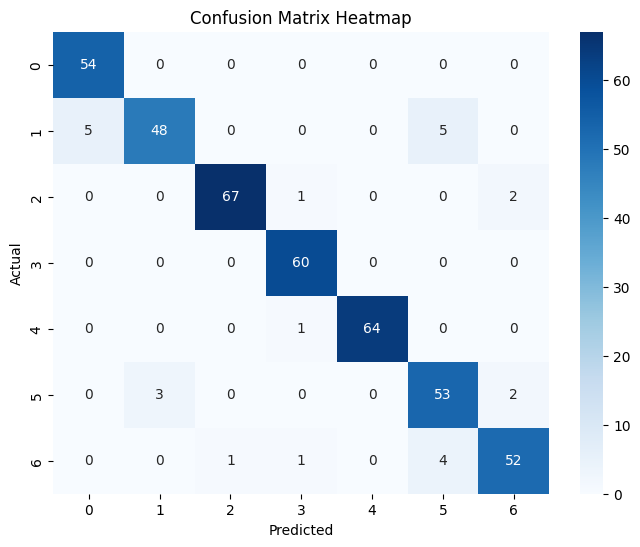

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


### ROC Curve for Each Class
*ROC curves are most relevant for binary classification but can be adapted for multiclass models*

We plot ROC curves for each class using One-vs-Rest (OvR) strategy.


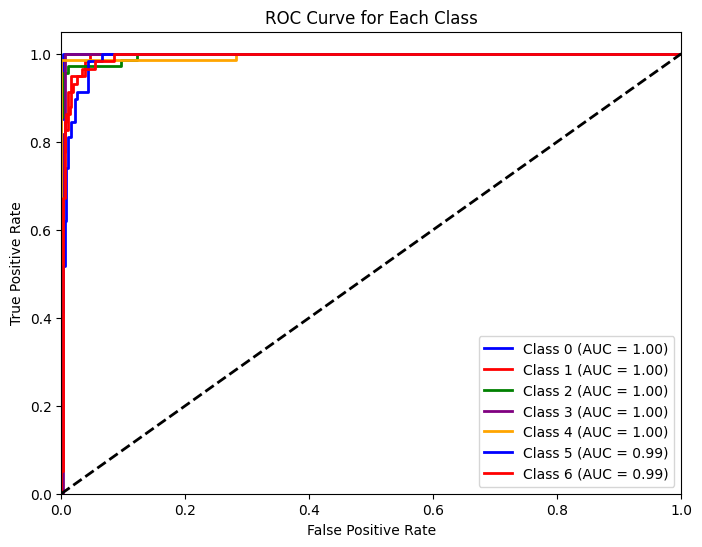

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the target labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=best_model.classes_)

# Get model probabilities
y_score = best_model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(["blue", "red", "green", "purple", "orange"])
for i, color in zip(range(len(best_model.classes_)), colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {best_model.classes_[i]} (AUC = {roc_auc:.2f})')

# Final plot adjustments
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.show()


### Feature Importance
We analyze the importance of each feature using model coefficients.


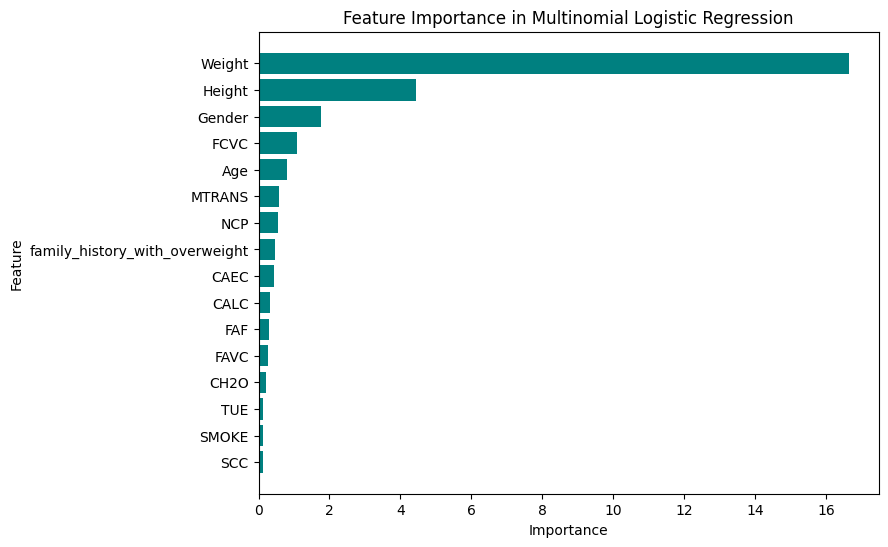

In [ ]:
import numpy as np

# Get feature names and importance
feature_importance = np.abs(best_model.coef_).mean(axis=0)
features = X_train.columns

# Sort by importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(features[sorted_idx], feature_importance[sorted_idx], color='teal')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Multinomial Logistic Regression")
plt.show()
